In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import ngram
import re
import string
import nltk
from nltk.util import ngrams
#nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, WhitespaceTokenizer, TweetTokenizer
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
from collections import Counter
#from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
stop_words = set(stopwords.words('english'))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1123)>


False

# Lectura de datos - Tweets EN_US

In [6]:
dataset=pd.read_csv("en_US.twitter.txt", delimiter="\t", header=None)
dataset.columns = ['tweets']

# Limpieza de datos

## Minúsculas

In [7]:
dataset['tweets'] = dataset['tweets'].str.lower()

In [8]:
dataset[:50]

,tweets
0,how are you? btw thanks for the rt. you gonna ...
1,when you meet someone special... you'll know. ...
2,they've decided its more fun if i don't.
3,so tired d; played lazer tag & ran a lot d; ug...
4,words from a complete stranger! made my birthd...
5,first cubs game ever! wrigley field is gorgeou...
6,i no! i get another day off from skool due to ...
7,i'm coo... jus at work hella tired r u ever in...
8,the new sundrop commercial ...hehe love at fir...
9,we need to reconnect this week


## Quitar emojis, caracteres especiales y url's

In [9]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

def RemoveWithRegex(regex, words):
    x = np.copy(words)
    punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    for i in range(len(x)):
        x[i] = re.sub(regex, '', x[i])
    
        x[i] = ' '.join(word.strip(string.punctuation) for word in x[i].split())
    
    return x

In [10]:
dataset_np = dataset.to_numpy()
dataset_np = dataset_np.flatten()

In [11]:
for i in range(len(dataset_np)):
    dataset_np[i] = deEmojify(dataset_np[i])
    
regex = '( ?\: ?\)| ?xd| ?\:d| ?\<3| ?\;\)| ?\( ?\:|\.\.\.|♥| ?\: ?\(| ?\) ?\:| ?rt ?\:|([@#][\w_-]+ ?)|https?:\/\/(www\.)?[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)|(www\.)?[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*))|([0-9])'
dataset_np = RemoveWithRegex(regex, dataset_np)

## Quitar stop words

In [148]:
dataset_load = pd.read_csv("clean_data.txt", delimiter="\t", header=None)
dataset_np = dataset_load.to_numpy()
dataset_np = dataset_np.flatten()

In [149]:
for i in range(len(dataset_np)):
    word_tokens = word_tokenize(dataset_np[i]) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    dataset_np[i] = ' '.join(filtered_sentence)

In [150]:
dataset_np[:10]

array(['btw thanks rt gon na dc anytime soon love see way way long',
       'meet someone special youll know heart beat rapidly youll smile reason',
       'theyve decided fun dont',
       'tired played lazer tag ran lot ughh going sleep like minutes',
       'words complete stranger made birthday even better',
       'first cubs game ever wrigley field gorgeous perfect go cubs go',
       'get another day skool due wonderful snow wakes updamn thing',
       'im coo jus work hella tired r u ever cali',
       'new sundrop commercial hehe love first sight',
       'need reconnect week'], dtype=object)

In [151]:
np.save('dataset.npy', dataset_np)

In [152]:
dataset_l = np.load('dataset.npy', allow_pickle=True)

# Frecuencia de palabras

In [153]:
words = ' '.join(dataset_l)

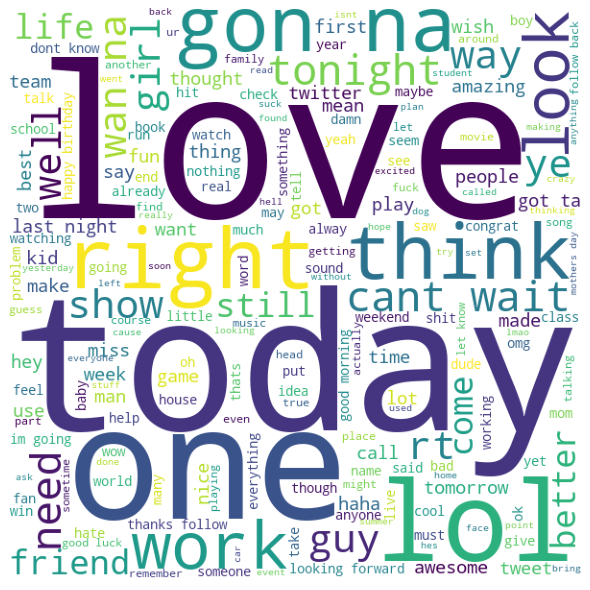

In [154]:
wordcloud = WordCloud(width = 600,
                      height = 600,
                      background_color ='white'
                    ).generate(words) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [155]:
words_ = words.split()
counts = Counter(words_)

In [156]:
def word_counter(cleaned_words):
    word_counter = {}
    for word in cleaned_words:
        if word in word_counter:
            word_counter[word] += 1
        else:
            word_counter[word] = 1
    return word_counter

In [157]:
word_counter = word_counter(words_)

In [158]:
word_counter_sorted = sorted(word_counter.items(), key=lambda x:x[1],reverse=True)

In [164]:
word_dict = dict(word_counter_sorted[0:10])

<BarContainer object of 10 artists>

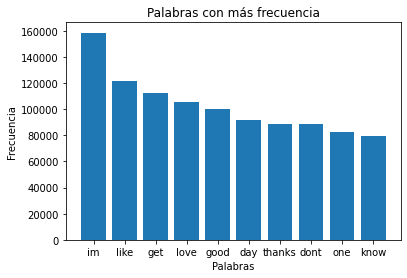

In [167]:
keys = word_dict.keys()
values = word_dict.values()
plt.title("Palabras con más frecuencia")
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.bar(keys, values)


### Discusión de frecuencias


Se puede observar en el histograma que las palabras con más frecuencia son 'im','like' y 'get'. Podemos inferir que la palabra 'like' hace referencia a tweets donde los usuarios solicitan un 'me gusta' a su propio tweet. De igual forma, como las palabras estan en inglés puede hacer referencia a objetos o actividades o frases que los usuarios indican que les gusta. Por otro lado, la palabra 'get' puede ser utilizada en distintos contextos dependiendo de las cuentas o del usuario que coloco dicho tweet. Al realizar una breve investigación de los tweets que contenian 'get' en ellos, se puede observarque las cuentas de deportes como Basketball, Futball, etc, utilizan esta palabra muy amenudo haciendo referencia a marcadores o jugadas que los jugadores del equipo obtuvieron o desean obtener. De igual forma al hacer 'social marketing' se utiliza la palabra 'get' para decir que se necesitan obtener cierta cantidad de likes, retweets y/o followers. Por último, los contextos distintos donde los usuarios utilizan dicha palabra para decir que obtuvieron algo en su vida personal o laboral. En cuanto a la letra 'u', es interesante ver como los usuarios de twitter utilizan esta abreviación para referirse a la palabra 'you'. Esto puede ser debido a la longitud de cada tweet los usuarios prefieren utilizan abreviaciones para que en ellos puedan poner más texto o bien el ingles informal es más utilizado en redes sociales. 

Llama la atención que para la nube de palabras como para el histograma la palabra 'love' tuvo una alta frecuencia, esto puede ser debido que la mayoría de usuarios les gusta comentar sobre cosas que les gusta hacer, comer, ver y/o jugar. Podemos observar el mismo patron con las palabras thanks, good y day. En la nube se observan que más abreviaturas tienen más frecuencia tales como 'gonna' 'gotta' 'wanna'. Entre las palabras interesantes de discutir se encuentra 'lol', el cual es un acronimo para 'laughing out loud', el cual indica que en la mayoría de tweets en donde se utiliza esto, son aquellos que hacen referencia a algo gracioso.

## Generación y predicción de n-gramas

In [199]:
dataset_l = np.load('dataset.npy', allow_pickle=True)

In [200]:
def extract_ngrams(data, num):
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [' '.join(grams) for grams in n_grams]

In [201]:
gram_2 = []
dataset = dataset_l[:150000] # se usará únicamente una muestra de los datos 
gram_3 = []

In [202]:
for item in dataset:
    gram_2.append(extract_ngrams(item, 2))

In [203]:
for item in dataset:
    gram_3.append(extract_ngrams(item, 3))

In [204]:
flat_list_gram3 = []
flat_list_gram2 = []
def flatList(data):
    flat_list = []
    for sublist in data:
        for item in sublist:
            flat_list.append(item)
    return flat_list

In [205]:
flat_list_gram2 = flatList(gram_2)

In [206]:
flat_list_gram3 = flatList(gram_3)

In [207]:
freq_gram2 = (Counter(flat_list_gram2))
freq_gram3 = (Counter(flat_list_gram3))

In [208]:
# obtención de los n-gramas más frecuentes 
sorted_freq_gram2 = freq_gram2.most_common()
sorted_freq_gram3 = freq_gram3.most_common()

Para facilidad y solo de demostración, se mostrará solo los primeros 25 n-gramas más frecuentes. 

In [214]:
sorted_freq_gram2[:25]

[('gon na', 1380),
 ('cant wait', 1084),
 ('wan na', 900),
 ('got ta', 731),
 ('last night', 713),
 ('looking forward', 569),
 ('dont know', 560),
 ('happy birthday', 508),
 ('good morning', 505),
 ('im going', 500),
 ('feel like', 460),
 ('thanks follow', 422),
 ('good luck', 391),
 ('follow back', 381),
 ('looks like', 376),
 ('let know', 366),
 ('mothers day', 344),
 ('! !', 318),
 ('im gon', 306),
 ('next week', 299),
 ('lets go', 289),
 ('sounds like', 278),
 ('dont think', 278),
 ('please follow', 269),
 ('would love', 266)]

In [215]:
sorted_freq_gram3[:25]

[('im gon na', 300),
 ('happy mothers day', 212),
 ('cant wait see', 199),
 ('let us know', 173),
 ('! ! !', 156),
 ('wan na go', 120),
 ('happy new year', 111),
 ('dont wan na', 97),
 ('got ta get', 88),
 ('got ta love', 78),
 ('im pretty sure', 70),
 ('gon na get', 68),
 ('gon na go', 67),
 ('wan na see', 66),
 ('cinco de mayo', 57),
 ('youre gon na', 57),
 ('dont even know', 56),
 ('cant wait till', 53),
 ('cant wait get', 53),
 ('would love see', 50),
 ('feel like im', 46),
 ('wan na get', 43),
 ('come see us', 43),
 ('love love love', 43),
 ('looking forward seeing', 42)]

## Matriz de términos y probabilidades de n-gramas

Debido a la alta cantidad de datos, se usará solo una muestra para demostrar las matrices, la frecuencia de los n-gramas y sus probabilidades. 

### Matriz de bigramas

In [230]:
# 
unique_tokens = []
for tup in sorted_freq_gram2[:10000]: # por falta de capacidad computacional, se usarán solo los primeros 10,000
    tup_str = tup[0].split()
    for token in tup_str:
        if token not in unique_tokens:
            unique_tokens.append(token)

In [237]:
sample_n = 6
matriz_terminos = np.zeros((sample_n, sample_n))
freq_arr = np.array(sorted_freq_gram2)
for i in range(sample_n):
    for k in range(sample_n):
        ngram = ' '.join([unique_tokens[i], unique_tokens[k]])
        find_index = np.where(freq_arr == ngram)
        if len(find_index[0]) != 0:
            matriz_terminos[i][k] = freq_arr[find_index[0][0]][1]

In [243]:
# impresión de matriz de términos (muestra) para bigramas
pd.DataFrame(matriz_terminos, index=unique_tokens[:sample_n], columns=unique_tokens[:sample_n])

,gon,na,cant,wait,wan,got
gon,1.0,1380.0,0.0,0.0,0.0,0.0
na,0.0,1.0,1.0,4.0,3.0,1.0
cant,0.0,0.0,3.0,1084.0,0.0,1.0
wait,3.0,0.0,5.0,7.0,0.0,0.0
wan,0.0,900.0,0.0,0.0,0.0,0.0
got,0.0,0.0,0.0,1.0,0.0,3.0


In [244]:
# impresión de matriz de probabilidades (muestra) para bigramas
pd.DataFrame(matriz_terminos/len(sorted_freq_gram2), index=unique_tokens[:sample_n], columns=unique_tokens[:sample_n])

,gon,na,cant,wait,wan,got
gon,0.000002,0.002152,0.000000,0.000000,0.000000,0.000000
na,0.000000,0.000002,0.000002,0.000006,0.000005,0.000002
cant,0.000000,0.000000,0.000005,0.001691,0.000000,0.000002
wait,0.000005,0.000000,0.000008,0.000011,0.000000,0.000000
wan,0.000000,0.001404,0.000000,0.000000,0.000000,0.000000
got,0.000000,0.000000,0.000000,0.000002,0.000000,0.000005


### Matriz de trigramas

In [246]:
# para los trigramas, se usarán los primeros dos tokens y se comparará con el último
unique_col_tokens = []
unique_row_tokens = []
for tup in sorted_freq_gram3[:5000]: # por falta de capacidad computacional, se usarán solo los primeros 10,000
    tup_str = tup[0].split()
    pair = ' '.join([tup_str[0], tup_str[1]])
    one = tup_str[2]
    if pair not in unique_col_tokens:
        unique_col_tokens.append(pair)
    if one not in unique_row_tokens:
        unique_row_tokens.append(one)

In [251]:
sample_n = 6
matriz_terminos_tri = np.zeros((sample_n, sample_n))
freq_arr = np.array(sorted_freq_gram3)
for i in range(sample_n):
    for k in range(sample_n):
        ngram = ' '.join([unique_col_tokens[i], unique_row_tokens[k]])
        find_index = np.where(freq_arr == ngram)
        if len(find_index[0]) != 0:
            matriz_terminos_tri[i][k] = freq_arr[find_index[0][0]][1]

In [254]:
# impresión de matriz de términos (muestra) para trigramas
pd.DataFrame(matriz_terminos_tri, index=unique_row_tokens[:sample_n], columns=unique_col_tokens[:sample_n])

,im gon,happy mothers,cant wait,let us,! !,wan na
na,300.0,0.0,0.0,0.0,0.0,0.0
day,0.0,212.0,0.0,0.0,0.0,0.0
see,0.0,2.0,199.0,0.0,1.0,19.0
know,0.0,0.0,1.0,173.0,0.0,1.0
!,0.0,0.0,0.0,1.0,156.0,0.0
go,0.0,0.0,66.0,29.0,0.0,120.0


In [256]:
# impresión de matriz de probabilidades (muestra) para trigramas
pd.DataFrame(matriz_terminos_tri/len(sorted_freq_gram3), index=unique_row_tokens[:sample_n], columns=unique_col_tokens[:sample_n])

,im gon,happy mothers,cant wait,let us,! !,wan na
na,0.000399,0.000000,0.000000,0.000000,0.000000,0.000000
day,0.000000,0.000282,0.000000,0.000000,0.000000,0.000000
see,0.000000,0.000003,0.000265,0.000000,0.000001,0.000025
know,0.000000,0.000000,0.000001,0.000230,0.000000,0.000001
!,0.000000,0.000000,0.000000,0.000001,0.000208,0.000000
go,0.000000,0.000000,0.000088,0.000039,0.000000,0.000160


Adicionalmente, podemos obtener las probabilidades sobre los trigramas de manera más fiel con Kneser-Ney smoothing probability (KNP). La implementación en python está diseñada únicamente para trigramas, por lo que no es posible obtenerla con bigramas. 

In [216]:
# obtener la probabilidad de cada uno de los trigramas. 
# con los bigramas no es posible usar el kneser smoother ya que está diseñado para trigramas. 
word_probs = {}
tuple_gram = [tuple(x.split()) for x in flat_list_gram3]
freq_dist = nltk.FreqDist(tuple_gram)
kneser_ney = nltk.KneserNeyProbDist(freq_dist)
for i in kneser_ney.samples():
    word_probs[i] = kneser_ney.prob(i)

In [260]:
# para hacer el display se tomará solo una muestra 
from itertools import islice
def take(n, iterable):
    return list(islice(iterable, n))

take(10, word_probs.items())

[(('btw', 'thanks', 'rt'), 0.0625),
 (('thanks', 'rt', 'gon'), 0.0016233766233766235),
 (('rt', 'gon', 'na'), 0.75),
 (('gon', 'na', 'dc'), 0.00018422991893883567),
 (('na', 'dc', 'anytime'), 0.25),
 (('dc', 'anytime', 'soon'), 0.25),
 (('anytime', 'soon', 'love'), 0.020833333333333332),
 (('soon', 'love', 'see'), 0.25),
 (('love', 'see', 'way'), 0.0035714285714285713),
 (('see', 'way', 'way'), 0.05)]

### Generación de modelo para predicción de n-gramas

In [168]:
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE
import dill as pickle 
from nltk.lm import KneserNeyInterpolated

In [169]:
tokenized_text =[]
for item in dataset_l[:150000]:
    tokenized_text.append(extract_ngrams(item, 1))

In [170]:
# se entrenará un modelo basado en bigramas
n = 2
train_data, padded_sents = padded_everygram_pipeline(n, tokenized_text)
model_2 = MLE(n)
model_2.fit(train_data, padded_sents)

In [171]:
with open('bigram-model.pkl', 'wb') as fout:
    pickle.dump(model_2, fout)
    

In [172]:
# adicionalmente se entrenará un modelo basado en trigramas
n = 3
train_data_3, padded_sents_3 = padded_everygram_pipeline(n, tokenized_text)
model_3 = MLE(n)
model_3.fit(train_data_3, padded_sents_3)
with open('trigram-model.pkl', 'wb') as f_out:
    pickle.dump(model_3, f_out)

## Predicción de siguientes 3 palabras con un input

In [173]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

detokenize = TreebankWordDetokenizer().detokenize

def generate_sentence(model, num_words, word):
    content = []
    for token in model.generate(num_words, text_seed=word, random_seed=0):
        if token == '<s>':
            continue
        if token == '</s>':
            break
        content.append(token)
    return detokenize(content)

Realizaremos pruebas con ambos modelos entrenados, en donde uno fue con bigramas y el otro con trigramas y se verá qué tan coherentes resultan las predicciones con un modelo vs. el otro. 

In [174]:
generate_sentence(model_3, 3, "hello twitter!")

'im suzie rhine'

In [175]:
generate_sentence(model_3, 3, "we go to the beach")

'n u didnt'

In [176]:
generate_sentence(model_3, 3, "i want")

'since said nobody'

In [177]:
generate_sentence(model_3, 3, "today my dog")

'service day huge'

In [198]:
generate_sentence(model_3, 3, "willy wonka likes chocolate")

'rich foods need'

In [184]:
generate_sentence(model_2, 3, "hello twitter!")

'shop seeking interns'

In [185]:
generate_sentence(model_2, 3, "we go to the beach")

'streets philly fans'

In [186]:
generate_sentence(model_2, 3, "i want")

'struggling sit fuck'

In [187]:
generate_sentence(model_2, 3, "today my dog")

'service recent lack'

In [197]:
generate_sentence(model_2, 3, "willy wonka likes chocolate")

'rich people gosh'

In [183]:
generate_sentence(model_3, 5, "today my dog")

'service day huge success right'

In [188]:
generate_sentence(model_2, 5, "today my dog")

'service recent lack enthusiam herecop'

## Discusión de resultados

Al realizar las pruebas, se observa que, mientras las oraciones producidas en su totalidad no tienen demasiada coherencia, los grupos de palabras sí tienen relación entre sí; como por ejemplo, grupos como "recent lack enthusiasm" o "day huge success right" o "im suzie rhine" son enunciados que tienen sentido. La continuación del texto que predicen los modelos puede no ser tan fluida como se esperaría debido a que no se pudieron utilizar todos los datos proveídos (se utilizó únicamente alrededor del 6% del total) debido a que no se tenía la capacidad computacional - tanto de memoria como de procesamiento - para entrenar el modelo con todo el dataset. Debido a esto, el modelo tiende a fallar un poco en sus predicciones, pero aún así el texto que brinda es lo suficientemente bueno. 

Se realizaron dos modelos: uno de trigrama y uno de bigrama. El modelo de trigrama encuentra la probabilidad de una próxima palabra basada en sus dos últimos términos inmediatos, mientras que el de bigrama únicamente se basa en la última palabra. Esto puede observarse en los ejemplos anteriores, ya que a veces ambos modelos predicen la misma siguiente palabra, pero en el caso de "willy wonka likes chocolate," el modelo de trigrama sugiere "rich foods" y el de bigrama relaciona "rich people," demostrando que se basó en únicamente "rich."

La diferencia entre ambos modelos radica, primero en la complejidad entre ambos y es esta complejidad que permite al modelo de trigramas armar predicciones más complejas que el caso del modelo de bigramas. Por ejemplo, nuestros teléfonos celulares tienen teclados virtuales que sugieren palabras, el caso de ellos es predicción de bigramas, toman la ultima palabra escrita y proponen inmediatamente una palabra. Si el celular predijera a través de trigramas, este propondría frases simples, puesto que buscaría armar una pequeña frase. Dado a las limitaciones computacionales y prácticas de nuestros dispositivos móviles, ellos sugieren a través de bigramas.